Use pandas and numpy to efficiently read and manipulate all the cell towers data.

In [132]:
import pandas as pd
import numpy as np

Using a brute-force approach, start with 6 towers each with a distinct frequency. ind the distances of the nearest towers with distinct frequencies 

Add the rest of the towers iteratively.
When adding a tower, calculate the distance between the new tower and all other tower.
Keep track of the frequencies and for each frequency keep track of the one closest to the new tower.
Assign the new tower the frequency of the farthest tower (from the list of the closest distinct-frequency towers)

make use of OOP to encapsulate data and make changes more frequenctly

In [133]:
import math

class Cell:
	def __init__(self, cell_id, easting, northing, lon, lat):
		self.cell_id = cell_id
		self.easting = easting
		self.northing = northing
		self.lon = lon
		self.lat = lat
		self.frequency = None

	def __repr__(self):
		return f"Cell_id: {self.cell_id}\t Easting: {self.easting} \t Northing: {self.northing} \t Frequency = {self.frequency}"

	def __str__(self):
		return f"Cell_id: {self.cell_id}\t Easting: {self.easting} \t Northing: {self.northing} \t Frequency = {self.frequency}"

def calculate_distance(cell1, cell2):
	return math.sqrt((cell1.easting - cell2.easting)**2 + (cell1.northing - cell2.northing)**2)

In [134]:
raw_cells = []
cells = []

data = pd.read_csv('cell_towers.csv')

# Iterate over the rows of the DataFrame and create Cell objects
for index, row in data.iterrows():
    raw_cell = Cell(row['Cell ID'], row['Easting'], row['Northing'], row['Long'], row['Lat'])
    raw_cells.append(raw_cell)

#raw_cells.reverse()

# The first 6 cells have distinct frequencies

size = len(raw_cells)

num = 6 if size > 6 else size
for i in range(6):
	cell: Cell = raw_cells.pop()
	cell.frequency = i+105
	cells.append(cell)

for i in range(len(raw_cells)):
	new_cell = raw_cells.pop()

	freqs = {
		105: float('inf'),
		106: float('inf'),
		107: float('inf'),
		108: float('inf'),
		109: float('inf'),
		110: float('inf')
	}

	for cell in cells:
		distance = calculate_distance(new_cell, cell)
		freqs[cell.frequency] = min(distance, freqs[cell.frequency])

	# Get the frequency associated with the closest tower
	max_key = max(freqs, key=freqs.get)
	new_cell.frequency = max_key
	cells.append(new_cell)

for cell in cells:
	print(cell)


Cell_id: S	 Easting: 538050 	 Northing: 184245 	 Frequency = 105
Cell_id: R	 Easting: 537953 	 Northing: 184295 	 Frequency = 106
Cell_id: Q	 Easting: 537910 	 Northing: 184441 	 Frequency = 107
Cell_id: P	 Easting: 537905 	 Northing: 184591 	 Frequency = 108
Cell_id: O	 Easting: 537720 	 Northing: 184057 	 Frequency = 109
Cell_id: N	 Easting: 537604 	 Northing: 184134 	 Frequency = 110
Cell_id: M	 Easting: 537458 	 Northing: 184495 	 Frequency = 105
Cell_id: L	 Easting: 537380 	 Northing: 184727 	 Frequency = 109
Cell_id: K	 Easting: 537356 	 Northing: 184927 	 Frequency = 106
Cell_id: J	 Easting: 537270 	 Northing: 184140 	 Frequency = 108
Cell_id: I	 Easting: 537269 	 Northing: 183451 	 Frequency = 107
Cell_id: H	 Easting: 537267 	 Northing: 184783 	 Frequency = 110
Cell_id: G	 Easting: 537250 	 Northing: 185020 	 Frequency = 107
Cell_id: F	 Easting: 537248 	 Northing: 185016 	 Frequency = 108
Cell_id: E	 Easting: 537206 	 Northing: 184685 	 Frequency = 107
Cell_id: D	 Easting: 5371

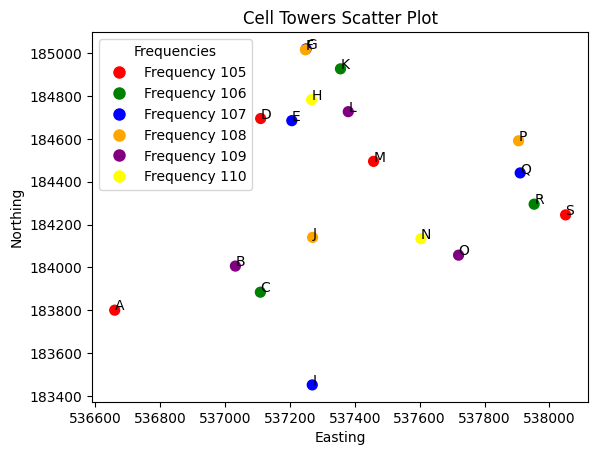

In [131]:
# Define colors for each frequency
color_mapping = {
    105: 'red',
    106: 'green',
    107: 'blue',
    108: 'orange',
    109: 'purple',
    110: 'yellow'

}


north_values = [cell.easting for cell in cells]
east_values = [cell.northing for cell in cells]
frequency_values = [cell.frequency for cell in cells]

# Create a scatter plot with distinct colors for frequencies
scatter = plt.scatter(north_values, east_values, c=[color_mapping[f] for f in frequency_values], s=50)


# Set legend for colors
legend_labels = [f'Frequency {f}' for f in color_mapping.keys()]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[f], markersize=10) for f in color_mapping.keys()]
plt.legend(legend_handles, legend_labels, title='Frequencies')


# Set labels and title
plt.ylabel('Northing')
plt.xlabel('Easting')
plt.title('Cell Towers Scatter Plot')

for i, cell_id in enumerate(data['Cell ID']):
    plt.annotate(cell_id, (data['Easting'][i], data['Northing'][i]))

# Show the plot
plt.show()

It is worth noting that this implementation is not the most correct but it is a very close approximation for the the ideal solution.
This implementation assigns different values based on the order of the cells in the list.
This solution is O(n^2) while the most correct implementation would cost us O(6^n).
The most correct implementation would have us calculate all the possible permutaions and compare them to find the most effective one

This implementation also allows us to expand to a 3D space with longitude, latitude and altitude by just simply adjusting the `calculate_distance` function to take into account the third dimension